In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import matrix
from numpy import linalg
from __future__ import division

In [2]:
def correlation_plot_q1(predicted_y,true_y):
    n = len(predicted_y[0])
    for j in range(n):
        y = true_y[:,j]
        t = predicted_y[:,j]
        mean_y = np.mean(y)
        mean_t=np.mean(t)
        sum = 0
        for i in range(len(y)):
            sum+= (y[i]-mean_y)*(t[i]-mean_t)
        covariance = sum/len(y)
        s_true = np.std(y)
        
        m = covariance/(s_true**2)
        b = np.mean(t)-m*np.mean(y)
        
        regression_line_y = np.multiply(m, y) + b
        
        # Plot the scatter points and regression line
        plt.plot(y, t,'bo',alpha=0.7)
        plt.plot(y, regression_line_y, color='red')

        # Add labels and title
        plt.xlabel(f'true y{j+1}')
        plt.ylabel(f'predicted y{j+1}')
        plt.title('correlation plot')

        # Show the plot
        plt.show()

In [3]:
def print_metrics_q12(pred_y,true_y):
    n = len(pred_y[0])
    for j in range(n):
        t=pred_y[:,j]
        y=true_y[:,j]
        print(f"{mse(y,t)} is the mean squared error for y{j+1}")
        print(f"{mae(y,t)} is the mean absolute error for y{j+1}")
        print(f"{pcc(y,t)} is the correlation coefficient between true y{j+1} and predicted y{j+1}")
    

Loading the data for first question

In [4]:
#loading the data for 1st part
with open("regression_data_multilinear_group_13_train.txt", "r") as f:
    data = []
    for line in f: 
        d = line.strip().split()
        data.append(d)
#create training and testing data
#removing the first line feat1 feat2 ... 
data = data[1:]
data_size = len(data)
test_size = int(0.7 * data_size)
#randomly selecting indices for testing and training data
indices = np.random.permutation(data_size)

train_data = np.array([data[i] for i in indices[:test_size]],dtype=float)
#put test data here
test_data= np.array([data[i] for i in indices[test_size:]],dtype=float)
train_x1 = train_data[:,:10]
train_y1 = train_data[:,10:]
test_x1 = test_data[:,:10]
test_y1 = test_data[:,10:]

Q1. Multilinear Regression 

We perform ERM with squared error loss.
We take x as input matrix of 10D vector and y as true 3D output.
Given in question "The features are readings from 10 sensors in the experiment environment. It is experimentally seen that the position of the particle depends linearly on these readings."

We assume the relation ship to be h(x)=wx with the bias term included
For each output dimension we take a hypothesis [h1 h2 h3]

Finding weights using closed form solution

In [5]:
#calculating weights for Q1
def weight_q1():
    size = len(train_x1)
    x0 = np.ones((size,1),dtype=float)
    y = train_y1
    x = np.concatenate((x0,train_x1),axis=1)
    temp = np.dot(matrix.transpose(x),x)
    t = linalg.inv(temp)
    w = np.dot(np.dot(t,matrix.transpose(x)),y)
    return w

In [6]:
def weight_q1_with_regularization():        
    size = len(train_x1)
    x0 = np.ones((size,1),dtype=float)
    y = train_y1
    x = np.concatenate((x0,train_x1),axis=1)
    temp = np.dot(matrix.transpose(x),x)

    i = np.identity(len(temp))

    t = linalg.inv(50*i+temp)
    w = np.dot(np.dot(t,matrix.transpose(x)),y)
    return w

In [7]:
#calculating mean squared error,  mse(true_y,predicted_y)
def mse(y,t):
    n = len(y)
    loss = 0
    
    for i in range(n):
        loss+= (y[i]-t[i])**2
    mean_loss= loss/n
    return mean_loss

In [8]:
#calculating mean absolute error, mae(true_y,predicted_y)
def mae(y,t):
    n = len(y)
    loss = 0
    for i in range(n):
        loss+= abs(y[i]-[t[i]])
    mean_loss= loss/n
    type(mean_loss)
    return mean_loss[0]

In [9]:
# Calculate pearson correlation coefficient pcc(true_y,predicted_y)
def pcc(y,t):
    
    covariance = np.cov(y, t)[0, 1]
    std_dev_y = np.std(y)
    std_dev_t = np.std(t)

    r = covariance/(std_dev_y*std_dev_t)
    return r


Testing for Q1

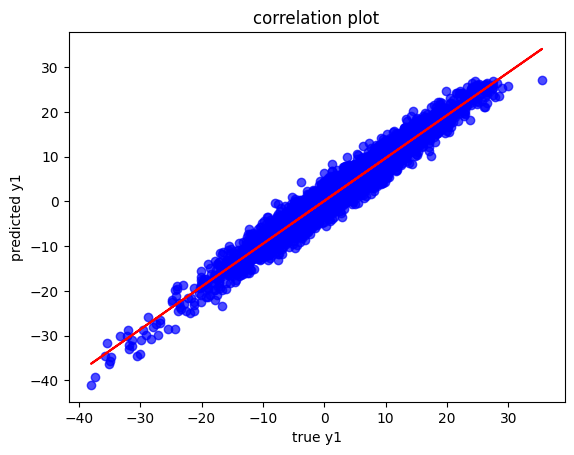

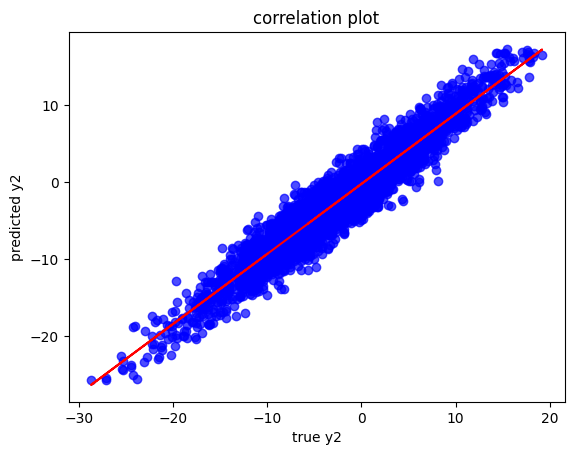

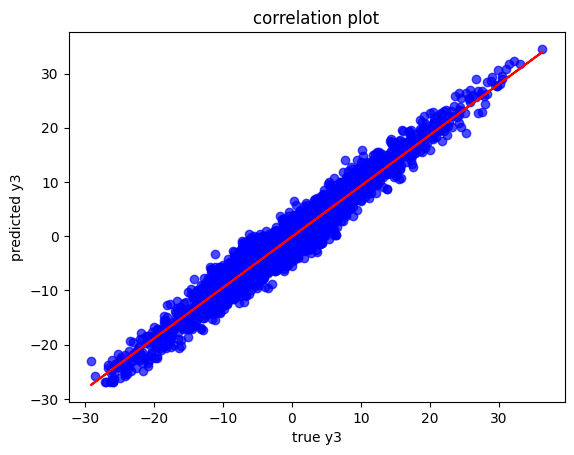

4.246915366723648 is the mean squared error for y1
1.6393009568418297 is the mean absolute error for y1
0.9753181283169655 is the correlation coefficient between true y1 and predicted y1
3.9908196801014797 is the mean squared error for y2
1.5918837225073357 is the mean absolute error for y2
0.954511603015133 is the correlation coefficient between true y2 and predicted y2
4.130728074704053 is the mean squared error for y3
1.6234515419605553 is the mean absolute error for y3
0.9694723758790326 is the correlation coefficient between true y3 and predicted y3


In [10]:

#testing    
w = weight_q1()
n = len(test_y1)
size = len(test_x1)
#adding x0 = 1 to x in order to incorporate the bias w0 in w
x0 = np.ones((size,1),dtype=float)
x = np.concatenate((x0,test_x1),axis=1)
pred_y = np.zeros((n,3),dtype=float)
for i in range(n):
    t = np.dot(np.transpose(w),x[i])
    pred_y[i] = t

correlation_plot_q1(pred_y,test_y1)
print_metrics_q12(pred_y,test_y1)


Q2. Generalised Regression with polynomial kernel

Now, it turns out that the position only depends on the magnitude of the force along 2 basis vectors (features 1 and 2). That is, the recordings in Q1 are derived quantities from these two independent features and share a polynomial relationship. 

We take various kernels for experimentation, the most optimal results were obtained when features were added and then passed on to kernel as dont in "ker_deg_10_a" function.

In [11]:
#loading the data for 2nd part
with open("regression_data_multiGen_group_13_train.txt", "r") as f:
    data = []
    for line in f: 
        d = line.strip().split()
        data.append(d)
#create training and testing data
#removing the first line feat1 feat2 ... 
data = data[1:]
data_size = len(data)
test_size = int(0.7 * data_size)
indices = np.random.permutation(data_size)
train_data = np.array([data[i] for i in indices[:test_size]],dtype=float)
test_data= np.array([data[i] for i in indices[test_size:]],dtype=float)
train_x2 = train_data[:,:2]
train_y2 = train_data[:,2:]
test_x2 = test_data[:,:2]
test_y2 = test_data[:,2:]

In [12]:
def correlation_plot_q2(predicted_y,true_y):
    n = len(predicted_y[0])
    for j in range(n):
        y = true_y[:,j]
        t = predicted_y[:,j]
        mean_y = np.mean(y)
        mean_t=np.mean(t)
        sum = 0
        for i in range(len(y)):
            sum+= (y[i]-mean_y)*(t[i]-mean_t)
        covariance = sum/len(y)
        s_true = np.std(y)
        
        m = covariance/(s_true**2)
        b = np.mean(t)-m*np.mean(y)
        
        regression_line_y = np.multiply(m, y) + b
        
        # Plot the scatter points and regression line
        plt.plot(y, t,'bo',alpha=0.7)
        plt.plot(y, regression_line_y, color='red')

        # Add labels and title
        plt.xlabel(f'true y{j+1}')
        plt.ylabel(f'predicted y{j+1}')
        plt.title('correlation plot')

        # Show the plot
        plt.show()

In [13]:
def weight_q2(ker):
    y = train_y2
    temp = np.dot(matrix.transpose(ker),ker)
    t = linalg.inv(temp)
    print(t.shape)
    w = np.dot(np.dot(t,matrix.transpose(ker)),y)
    
    return w


In [14]:
#calcultes the polynomila kernel for feature vector x and returns another vector
# x = sqrt(x1^2+x2^2) kernel = [1 x]
def poly_kernel_deg1(x):
    n = len(x)
    
    ker = np.ones((n,2))
    for i in range(n):
        ker[i,1] = np.sqrt(x[i,0]**2+x[i,1]**2)
    return ker

In [15]:
#calcultes the polynomila kernel for feature vector x and returns another vector
# x = sqrt(x1^2+x2^2) kernel = [1 x x^2]
def poly_kernel_deg2(x):
    n = len(x)
    
    ker = np.ones((n,3))
    for i in range(n):
        ker[i,1] = np.sqrt(x[i,0]**2+x[i,1]**2)
        ker[i,2] = x[i,0]**2+x[i,1]**2
    return ker

In [16]:
#Assuming the feature 1 and 2 represnt magnitude of two forces such as
# gravitational pull and air resistance
def kernel_deg_2(x):
    n = len(x)
    
    ker = np.ones((n,3))
    for i in range(n):
        ker[i,1] = (x[i][0]+x[i][1])
        ker[i,2] = (x[i][0]+x[i][1])**2
    return ker

In [58]:
def kernel_deg_3(x):
    n = len(x)
    
    ker = np.ones((n,10))
    for i in range(n):

        ker[i,1] = x[i][0]**2
        ker[i,2] = x[i][1]**2
        ker[i,3] = x[i][0]**3
        ker[i,4] = x[i][1]**3
        ker[i,5] = x[i][0]*x[i][1]
        ker[i,6] = x[i][0]**2*x[i][1]
        ker[i,7] = x[i][0]*x[i][1]**2
        ker[i,8] = x[i][0]
        ker[i,9] = x[i][1]

    return ker

In [18]:
def kernel_deg_10_a(x):
    n = len(x)
    
    ker = np.ones((n,11))
    for i in range(n):
        for j in range(1,11):
            ker[i,j] = (x[i][0]+x[i][1])**j
    return ker

In [19]:
def kernel_deg_10_b(x):
    n = len(x)
    
    ker = np.ones((n,11))
    for i in range(n):
        for j in range(1,11):
            ker[i,j] = (x[i][0])**j+x[i][1]**j
    return ker

In [59]:
#calculating kernel output and weights
ker = kernel_deg_3(train_x2)
w = weight_q2(ker)


(10, 10)


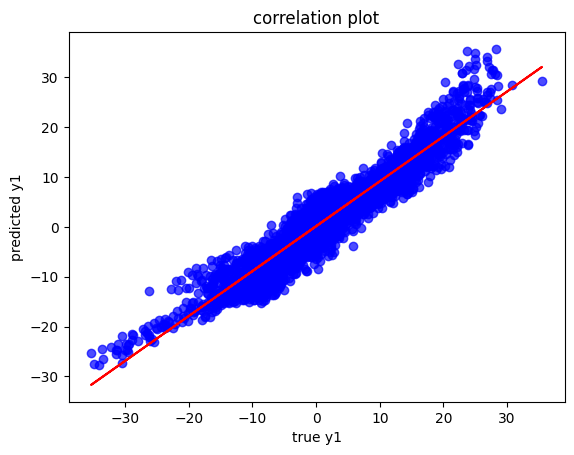

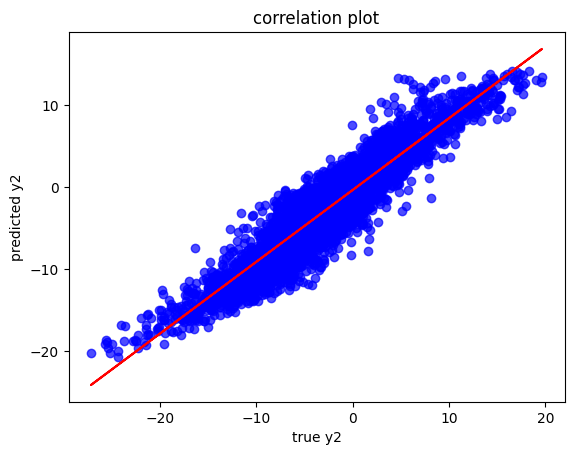

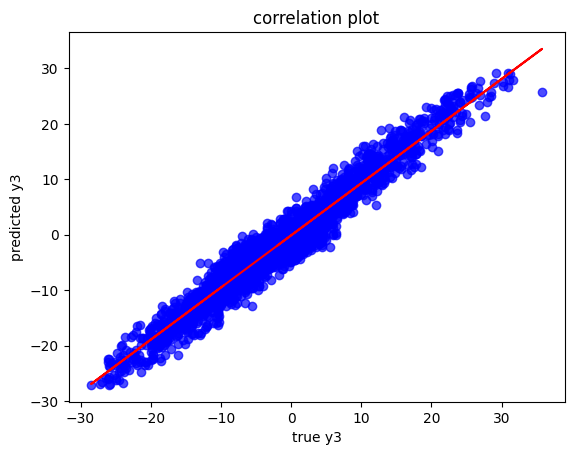

8.578663244826355 is the mean squared error for y1
2.2961886925487467 is the mean absolute error for y1
0.9510947338327668 is the correlation coefficient between true y1 and predicted y1
5.747585005968985 is the mean squared error for y2
1.9061363895596557 is the mean absolute error for y2
0.9329938026300125 is the correlation coefficient between true y2 and predicted y2
4.4793783780733785 is the mean squared error for y3
1.6815504452161845 is the mean absolute error for y3
0.9680500069399534 is the correlation coefficient between true y3 and predicted y3


In [60]:
#testing    
x = kernel_deg_3(test_x2)
size = len(x)
pred_y = np.zeros((size,3),dtype=float)

for i in range(size):
    t = np.dot(np.transpose(w),x[i])
    pred_y[i] = t

correlation_plot_q2(pred_y,test_y2)
print_metrics_q12(pred_y,test_y2)


Q3. Generalised Regression with non-polynomial kernel


We used gaussian and sigmoidal kernels for predicting probablity, for weight we have used the closed form solution

Loading the data and spliting into training and testing data


In [22]:
with open("regression_data_uni_group_13_train.txt", "r") as f:
    data = []
    for line in f: 
        d = line.strip().split()
        data.append(d)
#create training and testing data
#removing the first line feat1 feat2 ... 
data = data[1:]
data_size = len(data)
test_size = int(0.8 * data_size)
indices = np.random.permutation(data_size)
train_data = np.array([data[i] for i in indices[:test_size]],dtype=float)
test_data= np.array([data[i] for i in indices[test_size:]],dtype=float)
train_x3 = train_data[:,:5]
train_y3 = train_data[:,5]
test_x3 = test_data[:,:5]
test_y3 = test_data[:,5]

In [23]:
#calculating the weights
def weight_q3(ker):
    y = train_y3
    temp = np.dot(matrix.transpose(ker),ker)
    i = np.identity(len(temp))
    #t = linalg.inv(30*i+temp)
    t = linalg.inv(temp)
    
    w = np.dot(np.dot(t,matrix.transpose(ker)),y)
    
    return w

In [24]:
def non_poly_ker_exp(x):
    ker = np.ones((len(x),len(x[0])+1), dtype=float)
    for i in range(len(x)):
        ker[i,1:] = np.exp(x[i])
    
    return ker

In [25]:
import math
def gaussian_ker(x,u,s):
    ker = np.ones((len(x),len(x[0])+1), dtype=float)
    for i in range(len(x)):
        for j in range(len(x[0])):
            ker[i,j+1] = math.exp(-(x[i,j]-u[j])**2/(2*(s)**2))
    
    return ker

In [26]:
def non_polynomial_sigmoid(x,u,s):
    ker = np.ones((len(x),len(x[0])+1), dtype=float)
    for i in range(len(x)):
        for j in range(len(x[0])):
            ker[i,j+1] = 1/(1+math.exp(-(x[i,j]-u[j])/(s)))
    
    return ker

In [27]:
def correlation_plot_q3(pred_y,true_y):
    y = true_y
    t = pred_y
    mean_y = np.mean(true_y)
    mean_t=np.mean(pred_y)
    sum = 0
    for i in range(len(y)):
        sum+= (y[i]-mean_y)*(t[i]-mean_t)
    covariance = sum/len(y)
    s_true = np.std(y)
    
    m = covariance/(s_true**2)
    b = np.mean(t)-m*np.mean(y)
    
    regression_line_y = np.multiply(m, y) + b
    
    # Plot the scatter points and regression line
    plt.plot(y, t,'bo',alpha=0.7)
    plt.plot(y, regression_line_y, color='red')

    # Add labels and title
    plt.xlabel(f'true y')
    plt.ylabel(f'predicted y')
    plt.title('correlation plot')

    # Show the plot
    plt.show()

In [28]:
#calculating mean squared error,  mse(true_y,predicted_y)
def mse3(y,t):
    n = len(y)
    loss = 0
    
    for i in range(n):
        loss+= (y[i]-t[i])**2
    mean_loss= loss/n
    return mean_loss

In [29]:
#calculating mean absolute error, mae(true_y,predicted_y)
def mae3(y,t):
    n = len(y)
    loss = 0
    for i in range(n):
        loss+= abs(y[i]-[t[i]])
    mean_loss= loss/n
    type(mean_loss)
    return mean_loss[0]

In [30]:
# Calculate pearson correlation coefficient pcc(true_y,predicted_y)
def pcc3(y,t):
    
    covariance = np.cov(y, t)[0, 1]
    std_dev_y = np.std(y)
    std_dev_t = np.std(t)

    r = covariance/(std_dev_y*std_dev_t)
    return r


In [31]:
def print_metrics_q3(pred_y,true_y):
    t=pred_y
    y=true_y
    print(f"{mse3(y,t)} is the mean squared error for y")
    print(f"{mae3(y,t)} is the mean absolute error for y")
    print(f"{pcc3(y,t)} is the correlation coefficient between true yand predicted y")
    

In [32]:
u1 = np.mean(train_x3[:,0])
u2 = np.mean(train_x3[:,1])
u3 = np.mean(train_x3[:,2])
u4 = np.mean(train_x3[:,3])
u5 = np.mean(train_x3[:,4])
u=[u1,u2,u3,u4,u5]
u=[0,0,0,0,0]
s = 1
ker = non_polynomial_sigmoid(train_x3,u,s)
w = weight_q3(ker)
w.shape

(6,)

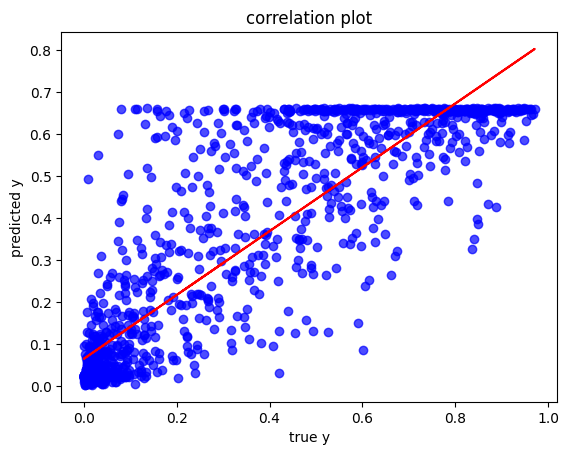

0.02134897112800187 is the mean squared error for y
0.09914839658945131 is the mean absolute error for y
0.8844210336948872 is the correlation coefficient between true yand predicted y


In [33]:
#testing    
size = len(test_x3)


x = non_polynomial_sigmoid(test_x3,u,s)

pred_y = np.zeros((size),dtype=float)

for i in range(size):
    t = np.dot(np.transpose(w),x[i])
    pred_y[i] = t

correlation_plot_q3(pred_y,test_y3)
#print(pred_y,test_y3)
print_metrics_q3(pred_y,test_y3)